In [1]:
import subprocess
import os
import sys

import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.multitest import multipletests
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

# Custom functions
sys.path.insert(1, '../')
from utils import *

# path with scPerturb data (replace accordingly)
data_path = '/fast/work/users/peidlis_c/data/perturbation_resource_paper/'
# temp path
SDIR = '/fast/scratch/users/peidlis_c/perturbation_resource_paper/'
# output from snakemake (tables)
table_path = '/fast/work/users/peidlis_c/projects/perturbation_resource_paper/single_cell_perturbation_data/code/notebooks/data_analysis/analysis_screens/tables/'
# path for figures
website_path = '../website/'
# path for supplemental figures and tables
supp_path = '../supplement/'

In [ ]:
# get indecs of dataset
h5_files = {}
for path, subdirs, files in os.walk(data_path):
    for name in files:
        if '.h5' in name: h5_files[name.split('.h5')[0]] = os.path.join(path, name)
del h5_files['exampledataset']
del h5_files['NormanWeissman2019_raw']
del h5_files['PapalexiSatija2021_eccite_arrayed_protein']
del h5_files['PapalexiSatija2021_eccite_protein']
del h5_files['FrangiehIzar2021_protein']
del h5_files['gene_scores']
del h5_files['peak_bc']
del h5_files['ChromVar']
del h5_files['LSI_embedding']
del h5_files['markerpeak_target']

del h5_files['XieHon2017']
datasets = list(h5_files.keys())
# print(len(datasets))

# SuppFig2

In [3]:
# capture obs and vars in a dict, indices as keis
obses = {}
vares = {}
key = 'NormanWeissman2019_filtered'
path = h5_files['NormanWeissman2019_filtered']
obses[key] = pd.read_csv(os.path.dirname(path)+'/obs.csv')
vares[key] = pd.read_csv(os.path.dirname(path)+'/var.csv')

  0%|          | 0/1 [00:00<?, ?it/s]

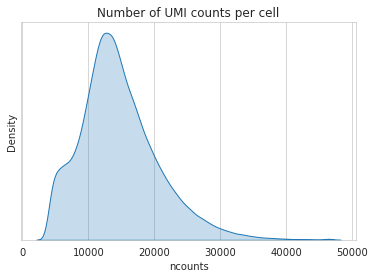

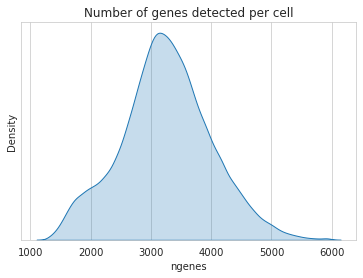

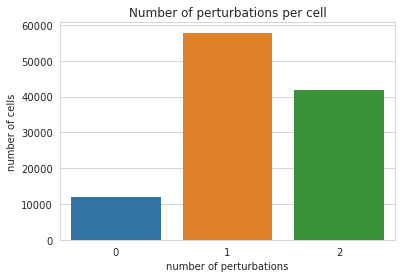

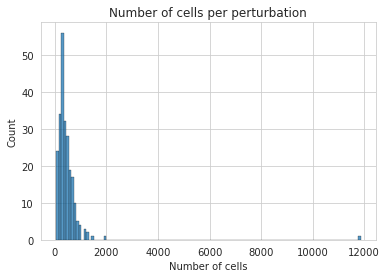

In [6]:
show = True
q = 0.05  # percentiles
for key, obs in tqdm(obses.items()):
    if 'ncounts' in obs.columns:
        with sns.axes_style('whitegrid'):
            fig, ax = pl.subplots(figsize=[6,4])
        df = obs.copy()
        df['ncounts'] = np.clip(df['ncounts'], np.percentile(df['ncounts'], q), np.percentile(df['ncounts'], 100-q))
        sns.kdeplot(data=df, x='ncounts', fill=True, ax=ax)
        ax.set_title('Number of UMI counts per cell')
        ax.set_yticks([])
        pl.savefig(f'{supp_path}SuppFig2_ncounts_{key}.pdf')
        pl.show() if show else pl.close()
            
    
    if 'ngenes' in obs.columns:
        with sns.axes_style('whitegrid'):
            fig, ax = pl.subplots(figsize=[6,4])
        df = obs.copy()
        df['ngenes'] = np.clip(df['ngenes'], np.percentile(df['ngenes'], q), np.percentile(df['ngenes'], 100-q))
        sns.kdeplot(data=df, x='ngenes', fill=True, ax=ax)
        ax.set_title('Number of genes detected per cell')
        ax.set_yticks([])
        pl.savefig(f'{supp_path}SuppFig2_ngenes_{key}.pdf')
        pl.show() if show else pl.close()
    
    if 'nperts' in obs.columns:
        if len(pd.unique(obs.nperts))>2:
            obs['nperts_'] = obs.nperts.astype(str)
            obs['nperts_'][obs.nperts>5] = '>5'
            df = obs.nperts_.value_counts().sort_index().reset_index()
            df.columns=['number of perturbations', 'number of cells']
            with sns.axes_style('whitegrid'):
                fig, ax = pl.subplots(figsize=[6,4])
            sns.barplot(data=df, x='number of perturbations', y='number of cells', ax=ax)
            ax.set_title('Number of perturbations per cell')
            pl.savefig(f'{supp_path}SuppFig2_nperts_{key}.pdf')
            pl.show() if show else pl.close()
    
    df = obs.value_counts('perturbation').reset_index()
    df.columns = ['perturbation', 'number of cells']
    with sns.axes_style('whitegrid'):
        fig, ax = pl.subplots(figsize=[6,4])
    sns.histplot(data=df, x='number of cells')
    ax.set_title('Number of cells per perturbation')
    ax.set_xlabel('Number of cells')
    pl.savefig(f'{supp_path}SuppFig2_ncellsperpert_{key}.pdf')
    pl.show() if show else pl.close()
